In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cycleGAN_model.py to cycleGAN_model.py
Saving instancenormalization.py to instancenormalization.py


Loaded dataA:  (494, 256, 256, 3)
Loaded dataB:  (1272, 256, 256, 3)


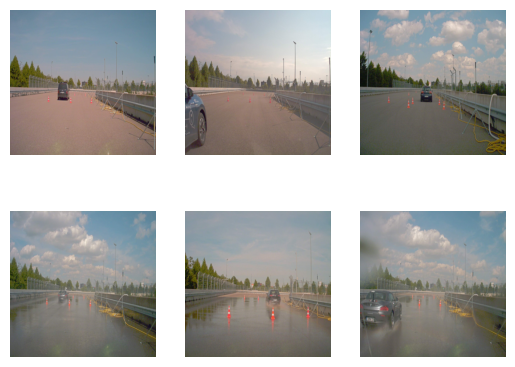

Loaded (400, 256, 256, 3) (500, 256, 256, 3)


In [ ]:
# https://youtu.be/VzIO5_R9XEM
# https://youtu.be/2MSGnkir9ew
"""
Cycle GAN: Monet2Photo

Dataset from https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/

"""

# monet2photo
import tensorflow as tf
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU'), 
                               'GPU')

from os import listdir
from numpy import asarray
from numpy import vstack
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
import numpy as np

# load all images in a directory into memory
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)


# dataset path
path = '/content/drive/MyDrive/samples/'

# load dataset A - Monet paintings
dataA_all = load_images(path + 'trainA/')
print('Loaded dataA: ', dataA_all.shape)

from sklearn.utils import resample
#To get a subset of all images, for faster training during demonstration
dataA = resample(dataA_all, 
                 replace=False,     
                 n_samples=400,    
                 random_state=5) 

# load dataset B - Photos 
dataB_all = load_images(path + 'trainB/')
print('Loaded dataB: ', dataB_all.shape)
#Get a subset of all images, for faster training during demonstration
#We could have just read the list of files and only load a subset, better memory management. 
dataB = resample(dataB_all, 
                 replace=False,     
                 n_samples=500,    
                 random_state=5) 

# plot source images
n_samples = 3
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + i)
	plt.axis('off')
	plt.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + n_samples + i)
	plt.axis('off')
	plt.imshow(dataB[i].astype('uint8'))
plt.show()



# load image data
data = [dataA, dataB]

print('Loaded', data[0].shape, data[1].shape)

#Preprocess data to change input range to values between -1 and 1
# This is because the generator uses tanh activation in the output layer
#And tanh ranges between -1 and 1
def preprocess_data(data):
	# load compressed arrays
	# unpack arrays
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

dataset = preprocess_data(data)


In [ ]:

from cycleGAN_model import define_generator, define_discriminator, define_composite_model, train
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)

from datetime import datetime 
start1 = datetime.now() 
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset, epochs=10)

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

############################################


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step
Iteration>338, dA[0.219,0.198] dB[0.056,0.265] g[2.492,3.445]
1/1 [==============================] - 0s 22ms/step
Iteration>339, dA[0.160,0.058] dB[0.084,0.127] g[2.379,3.060]
1/1 [==============================] - 0s 22ms/step
Iteration>340, dA[0.133,0.232] dB[0.187,0.179] g[2.534,2.559]
1/1 [==============================] - 0s 51ms/step
Iteration>341, dA[0.085,0.100] dB[0.129,0.094] g[2.568,2.587]
1/1 [==============================] - 0s 23ms/step
Iteration>342, dA[0.191,0.263] dB[0.099,0.131] g[2.706,2.916]
1/1 [==============================] - 0s 22ms/step
Iteration>343, dA[0.163,0.179] dB[0.094,0.026] g[3.555,3.551]
1/1 [==============================] - 0s 24ms/step
Iteration>344, dA[0.161,0.055] dB[0.196,0.162] g[2.644,3.078]
1/1 [==============================] - 0s 21ms/step
Iteration>345, dA[0.095,0.122] dB[0.064,0.326] g[2.396,2.668]
1/1 [==============================] 

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
Iteration>2338, dA[0.068,0.042] dB[0.022,0.012] g[2.164,2.657]
1/1 [==============================] - 0s 23ms/step
Iteration>2339, dA[0.012,0.159] dB[0.008,0.051] g[2.486,2.806]
1/1 [==============================] - 0s 24ms/step
Iteration>2340, dA[0.012,0.049] dB[0.027,0.038] g[2.742,2.990]
1/1 [==============================] - 0s 22ms/step
Iteration>2341, dA[0.129,0.164] dB[0.015,0.004] g[2.417,2.252]
1/1 [==============================] - 0s 32ms/step
Iteration>2342, dA[0.054,0.125] dB[0.012,0.013] g[2.318,1.848]
1/1 [==============================] - 0s 25ms/step
Iteration>2343, dA[0.042,0.035] dB[0.034,0.036] g[2.534,2.578]
1/1 [==============================] - 0s 21ms/step
Iteration>2344, dA[0.044,0.014] dB[0.051,0.405] g[2.191,4.007]
1/1 [==============================] - 0s 23ms/step
Iteration>2345, dA[0.087,0.046] dB[0.024,0.039] g[2.466,2.866]
1/1 [========================

>Saved: g_model_AtoB_004000.h5 and g_model_BtoA_004000.h5
Execution time is:  2:37:42.729784


1/1 [==============================] - 1s 783ms/step


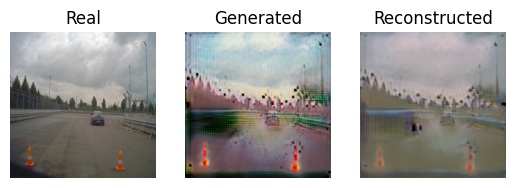

1/1 [==============================] - 0s 21ms/step


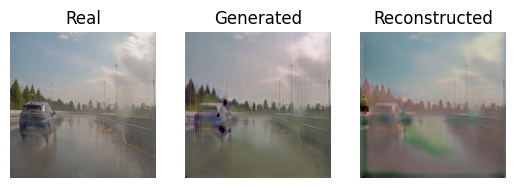

In [ ]:
# Use the saved cyclegan models for image translation
from instancenormalization import InstanceNormalization  
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint
from sklearn.utils import resample




# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, its translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
A_data = resample(dataA_all, 
                 replace=False,     
                 n_samples=5,    
                 random_state=3) # reproducible results

B_data = resample(dataB_all, 
                 replace=False,     
                 n_samples=5,    
                 random_state=3) # reproducible results

A_data = (A_data - 127.5) / 127.5
B_data = (B_data - 127.5) / 127.5


# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_AtoB_004000.h5', cust)
model_BtoA = load_model('g_model_BtoA_004000.h5', cust)

# plot A->B->A (Monet to photo to Monet)
A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)
# plot B->A->B (Photo to Monet to Photo)
B_real = select_sample(B_data, 1)
A_generated  = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)


1/1 [==============================] - 0s 35ms/step


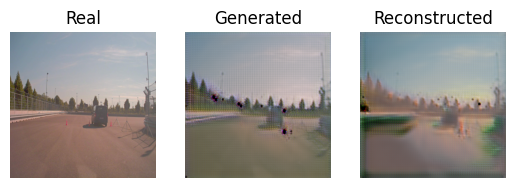

In [ ]:
#Load a single custom image
test_image = load_img('/content/drive/MyDrive/samples/testA/resized_1bdfa827-1652944222241765312.png')
test_image = img_to_array(test_image)
test_image_input = np.array([test_image])  # Convert single image to a batch.
test_image_input = (test_image_input - 127.5) / 127.5

# plot B->A->B (Photo to Monet to Photo)
monet_generated  = model_BtoA.predict(test_image_input)
photo_reconstructed = model_AtoB.predict(monet_generated)
show_plot(test_image_input, monet_generated, photo_reconstructed)